Hammerhead's Findings: 


Metric #1: Number of Feeder Students


My metric is to find the neighborhood with the most amount of feeder students. A 'feeder student' refers to a feeder school. Since feeder schools are defined as schools where students are more likely to move on towards 4 year institutions of higher level education, it stands to reason that neighborhoods with more feeder students would be the best neighborhood to raise a kid.    

Of the hundreds of Pittsburgh neighborhoods considered, Carrick stands at the top with the most feeder students. In the code below, you'll see a graphic demonstration of the aforementioned conclusion.

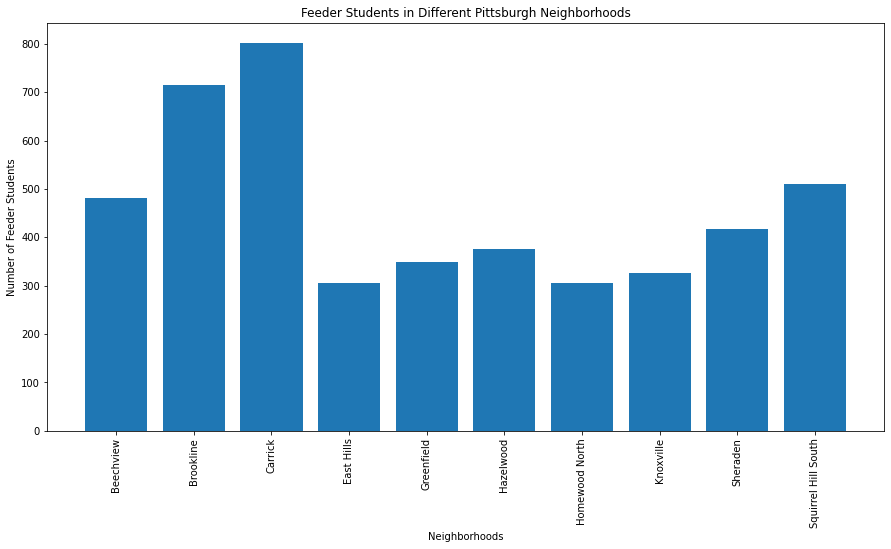

In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


neighborhood_feeder_dict = {}
dset = pd.read_csv("neighborhood_enrollment.csv")

##Use iterative loop to store values of each neighborhood into dictionary
for index, row in dset.iterrows():
    
    neighborhood = row['neighborhood']
    attending_feeder = row['attending_feeder']
    
    if neighborhood in neighborhood_feeder_dict.keys():
        neighborhood_feeder_dict[neighborhood] += attending_feeder
    else:
        neighborhood_feeder_dict[neighborhood] = 0
        

neighborhood_feeder_dict

##make another dictionary for neighbhorhoods with at least 300 feeder attending students
elite_feeder = {}

for key in neighborhood_feeder_dict:
    if neighborhood_feeder_dict[key] >= 300:
        elite_feeder[key] = neighborhood_feeder_dict[key] 
        

sequence = elite_feeder.items()
x, y = zip(*sequence) 

##matplot functions that allow display of bar graph with labels that are rotated 90 degrees for optimal viewing
plt.figure(figsize=(15,7.5))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Feeder Students")
plt.title("Feeder Students in Different Pittsburgh Neighborhoods")
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

Metric #2: Covid Rates

This metric tries to find the neigborhoods in Pittsburgh with the lowest rates of Covid-19. With Covid-19 having a large impact on our lives, finding the place with the lowest rates of being infected is the best for raising a child.

Below shows a normal curve of the rates of Covid-19 based on average rates of the neighborhoods surrounding it. Carrick has a middle of the pack score, being a very average place with fantastic schooling

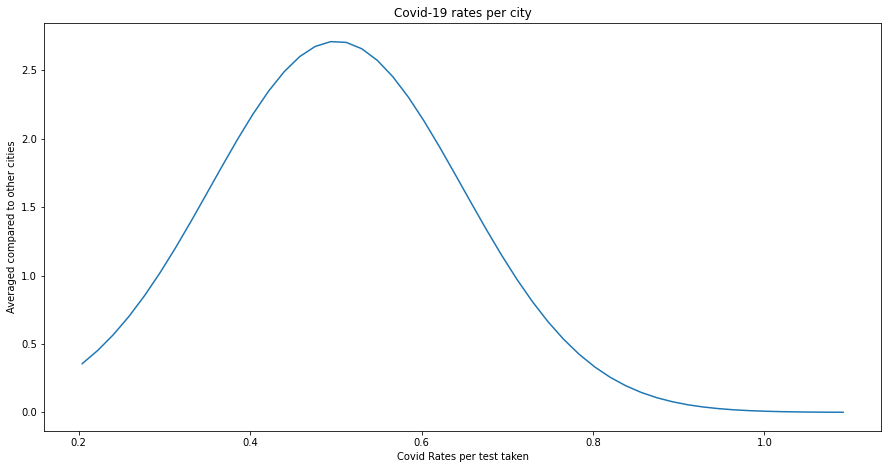

The rate at which people are infected with COVID-19 in Carrick is: 0.556


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

covid = pd.read_csv("covid_statistics.csv")


##Searches for the number of infections and the number of tests to find the percentage of infections per test taken.
##Filters out cities that don't have "(Pittsburgh)" in the name
infPerPCR = {}

for i in covid.index:
    if "Pittsburgh" in covid["neighborhood_municipality"][i]:
        negative_tests = covid["pcr_tests"][i]
        
        infPerPCR[covid["neighborhood_municipality"][i]] = (covid["infections"][i] + covid["reinfections"][i])/negative_tests
        infPerPCR[covid["neighborhood_municipality"][i]] = round(infPerPCR[covid["neighborhood_municipality"][i]], 4)

##

##Sorts the list from the lowest pecent to the highest
lowToHigh = {k: v for k, v in sorted(infPerPCR.items(), key = lambda v: v[1])}

##Plots the data as a normal curve
data = []

for key, value in lowToHigh.items():
    data = data + [value]
    
std = np.std(data, ddof=0)
mean = np.mean(data)

plt.figure(figsize=(15,7.5))
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.title("Covid-19 rates per city")
plt.xlabel("Covid Rates per test taken")
plt.ylabel("Averaged compared to other cities")
plt.show()

print("The rate at which people are infected with COVID-19 in Carrick is: " + str(infPerPCR["Carrick (Pittsburgh)"]))

Metric #3: Crime Rates

This metric is used to assess which neighborhoods in Pittsburgh have the lowest rates of crime. Understandably, raising a child in a neighborhood with the lowest rate of crime is ideal. 

Below is the code which displays neighborhoods with crime rates from the past 30 days. For Carrick, it falls in the 67th percentile for criminal activity(this is a reasonable rank for its crime rate). Since education was our most important metric and that neighborhood has the greatest number of feeder students, Carrick doesn't have to be the best neighborhood for safety(so long as it's at a reasonable rank for lack of criminal activity).

In [2]:
import pandas as pd
import math

crime = pd.read_csv("crime.csv")

## Create a dict of counters for every neighborhood
numIncidents = {}

# Iterate through the data table, incrementing counts for neighborhoods and
## creating entries for neighborhoods if they do not already exist in the dict.
for i in crime.index:
    if crime["INCIDENTNEIGHBORHOOD"][i] in numIncidents.keys():
        numIncidents[crime["INCIDENTNEIGHBORHOOD"][i]] += 1
    else:
        numIncidents[crime["INCIDENTNEIGHBORHOOD"][i]] = 1

# Hold values for all neighborhoods that have crime numbers lower than the threshold
mostIncidents = []
mostThreshold = 0

leastIncidents = []
leastThreshold = math.inf

# Function to update the above variables based on given low/high thresholds
# The expected ranges of low_threshold and high_threshold are 1-198 (already known lowest/highest values)
def findNeighborhoods(lessThan, greaterThan):
    global mostIncidents
    global mostThreshold
    global leastIncidents
    global leastThreshold

    highers = []
    lowers = []
    
    for n in numIncidents.keys():
        if numIncidents[n] >= greaterThan:
            highers.append(n)
        if numIncidents[n] <= lessThan:
            lowers.append(n)
            
    mostIncidents = sort(highers)
    mostThreshold = greaterThan
    
    leastIncidents = sort(lowers)
    leastThreshold = lessThan

# Print neighborhoods found above and list their specific number of incidents.
def printExtremes():
    print("These neighborhoods had more than " + str(mostThreshold) + " incidents in the past 30 days (3/14/2022 - 4/13/2022):\n")
    for n in mostIncidents:
        print("   " + str(n) + ": " + str(numIncidents[n]))

    print("\n")

    print("These neighborhoods had less than " + str(leastThreshold) + " incidents in the past 30 days (3/14/2022 - 4/13/2022):\n")
    for n in leastIncidents:
        print("   " + str(n) + ": " + str(numIncidents[n]))
        
def sort(nList):
    global mostIncidents
    
    global leastIncidents
    
    if (len(nList) < 2):
        return nList
    
    p = nList[0]
    
    if (len(nList) < 3):
        if (numIncidents[nList[0]] > numIncidents[nList[1]]):
            t = nList[0]
            nList[0] = nList[1]
            nList[1] = t
        return nList
    else:
        lessP = [i for i in nList[1:] if numIncidents[i] <= numIncidents[p]]
        greaterP = [i for i in nList[1:] if numIncidents[i] > numIncidents[p]]
        return sort(lessP) + [p] + sort(greaterP) 

findNeighborhoods(25, 125)
printExtremes()



These neighborhoods had more than 125 incidents in the past 30 days (3/14/2022 - 4/13/2022):

   South Side Flats: 127
   Carrick: 129
   Central Business District: 198


These neighborhoods had less than 25 incidents in the past 30 days (3/14/2022 - 4/13/2022):

   Ridgemont: 1
   East Carnegie: 1
   Outside County: 2
   Summer Hill: 2
   Chartiers City: 2
   Regent Square: 2
   Glen Hazel: 3
   Mt. Oliver Boro: 3
   Esplen: 4
   Hays: 4
   Mount Oliver: 5
   Arlington Heights: 6
   Spring Garden: 7
   Swisshelm Park: 8
   Fairywood: 8
   Outside City: 8
   Friendship: 8
   Allegheny West: 9
   Oakwood: 9
   Windgap: 9
   Fineview: 10
   Outside State: 10
   West End: 11
   Banksville: 11
   Beltzhoover: 13
   Upper Lawrenceville: 14
   Morningside: 14
   Polish Hill: 14
   Terrace Village: 14
   Spring Hill-City View: 14
   Manchester: 15
   California-Kirkbride: 15
   Duquesne Heights: 15
   South Shore: 16
   Upper Hill: 16
   South Oakland: 16
   Arlington: 17
   Point Breeze Nort